# 1. Data Understanding & Exploration:
rks]

In [271]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline

In [272]:
#    A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable.
#    B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable.

churn1 = pd.read_csv("TelcomCustomer-Churn_1.csv")
churn2 = pd.read_csv("TelcomCustomer-Churn_2.csv")



In [273]:
churn1.shape


(7043, 10)

In [274]:
churn2.shape

(7043, 12)

In [275]:
churn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB


In [276]:
churn2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   OnlineBackup      7043 non-null   object 
 2   DeviceProtection  7043 non-null   object 
 3   TechSupport       7043 non-null   object 
 4   StreamingTV       7043 non-null   object 
 5   StreamingMovies   7043 non-null   object 
 6   Contract          7043 non-null   object 
 7   PaperlessBilling  7043 non-null   object 
 8   PaymentMethod     7043 non-null   object 
 9   MonthlyCharges    7043 non-null   float64
 10  TotalCharges      7043 non-null   object 
 11  Churn             7043 non-null   object 
dtypes: float64(1), object(11)
memory usage: 660.4+ KB


In [277]:
churn1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [278]:
churn2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [279]:
#    C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame.
churnData = pd.merge(churn1, churn2, on="customerID", how='outer')

In [280]:
churnData.shape

(7043, 21)

In [281]:
# D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python.
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 2. Data Cleaning & Analysis:

In [282]:
# A. Impute missing/unexpected values in the DataFrame.

#Check data and if any unexpected value in the column
churnData.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [283]:
churnData.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [284]:
# Print value count for the catgorical column and see if it looks okay

print(churnData.gender.value_counts())
print(churnData.SeniorCitizen.value_counts())
print(churnData.Partner.value_counts())
print(churnData.Dependents.value_counts())
print(churnData.MultipleLines.value_counts())
print(churnData.InternetService.value_counts())
print(churnData.OnlineSecurity.value_counts())
print(churnData.DeviceProtection.value_counts())
print(churnData.TechSupport.value_counts())
print(churnData.StreamingTV.value_counts())
print(churnData.Contract.value_counts())
print(churnData.PaymentMethod.value_counts())

gender
Male      3555
Female    3488
Name: count, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64
Contract
Month-to-month    3875
Two year     

Observation: From above value count of catagorical columns, it looks okay.

In [285]:
# B. Make sure all the variables with continuous values are of ‘Float’ type.
# [For Example: MonthlyCharges, TotalCharges]

# Continuous variables: "tenure", "MonthlyCharges", "TotalCharges"

# Detecting missing value 
cnt=0
for row in churnData['TotalCharges']:
    try:
        float(row)
        
    except ValueError:
        churnData.loc[cnt, 'TotalCharges']=np.nan
    cnt+=1
churnData['TotalCharges'] = churnData['TotalCharges'].astype(float)
churnData['TotalCharges'].fillna(churnData['TotalCharges'].median(), inplace=True)
churnData['TotalCharges'].dtypes

dtype('float64')

In [286]:

for feature in churnData.columns: # Loop through all columns in the dataframe
    if churnData[feature].dtype == 'object': # Only apply for columns with categorical strings
        churnData[feature] = pd.Categorical(churnData[feature])# Replace strings with an integer
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [289]:
for feature in churnData.columns: # Loop through all columns in the dataframe
    if churnData[feature].dtype != 'category':
        churnData[feature].fillna(churnData[feature].median(), inplace=True)# Replace nan with median
churnData.shape

(7043, 21)

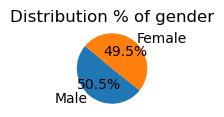

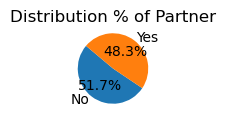

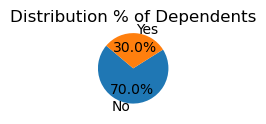

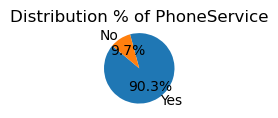

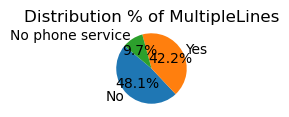

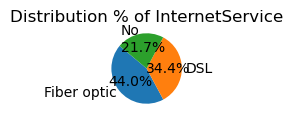

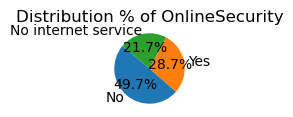

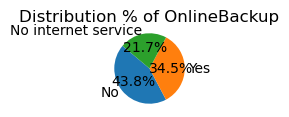

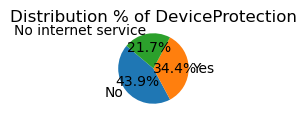

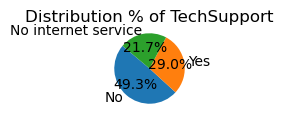

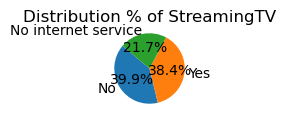

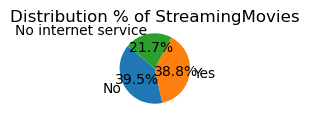

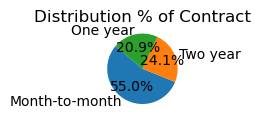

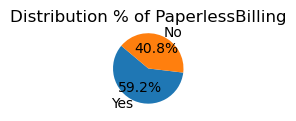

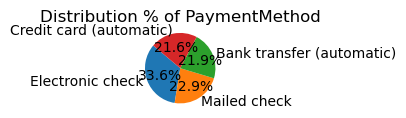

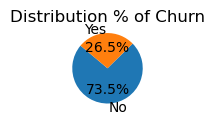

In [290]:
# C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage
#distribution in the pie-chart.

#['gender', 'Partner', 'Dependents', 'PhoneService',
# 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
# 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
# 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

def plot_pie_chart(df):
    # Check each column to determine if it is categorical
    cat_col = ['gender', 'Partner','Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
    
    for col in cat_col:
        val_count = df[col].value_counts(normalize=True) * 100
        labels = val_count.index
        sizes = val_count.values
        
        
        plt.figure(figsize=(1, 1))
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.title(f'Distribution % of {col}')
        plt.axis('equal')  
        plt.show()


plot_pie_chart(churnData)

- 1.) Gender and Parter distribution is almost 50% each.- 
2.) 90% of service useage is of phone service.
- 
3.) 48% don't use multiple lines, 42% use multiple lines, however 9.7% don't use phone services
- .
4.) Distributio of InternetService, OnlineSecurity, OnlineBackup, Device Protection, TechSupport, StreamingTV, StreamingMovies is identical. Truly so, coz all these services are interdependent on internet servic

- e.
5.) 55% people chose to be billed monthly. However there are 21% approx who have yearly billing and 24% have bi-yearly billi
- ng.
6.) 59% people choose to go paperl
- ess.
7.) 21.6% customer pay by Credit Card, 21.9% pay by bank transfer, 33.6% pays via electronic check and 22.9% via mailed c
- heck.
8.) 26.5% customer churn, however 73.5% customer do not churn.

In [291]:
# E. Encode all the appropriate Categorical features with the best suitable approach.

#PhoneService

print(churnData.gender.value_counts())
print(churnData.Partner.value_counts())
print(churnData.Dependents.value_counts())
print(churnData.PhoneService.value_counts())
print(churnData.MultipleLines.value_counts())
print(churnData.InternetService.value_counts())
print(churnData.OnlineSecurity.value_counts())
print(churnData.OnlineBackup.value_counts())
print(churnData.DeviceProtection.value_counts())
print(churnData.TechSupport.value_counts())
print(churnData.StreamingTV.value_counts())
print(churnData.StreamingMovies.value_counts())
print(churnData.Contract.value_counts())
print(churnData.PaperlessBilling.value_counts())
print(churnData.PaymentMethod.value_counts())
print(churnData.Churn.value_counts())

gender
Male      3555
Female    3488
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
StreamingTV
No                     2810
Y

In [292]:
# E. Encode all the appropriate Categorical features with the best suitable approach.


# Print value count for the catgorical column and see if it looks okay

#['gender', 'Partner', 'Dependents', 'PhoneService',
# 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
# 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
# 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

replaceStruct = {
                "gender":     {"Male": 1, "Female": 2},
                "Partner": {"No": 1, "Yes":2},
                 "Dependents": {"No": 1, "Yes":2},
                 "PhoneService": {"No": 1, "Yes":2},
                "MultipleLines": {"No": 1, "Yes":2, "No phone service": 3},
				"InternetService": {"Fiber optic": 2, "DSL":3, "No": 1},
                "OnlineSecurity": {"No": 1, "Yes":2, "No internet service": 3},
                "StreamingTV": {"No": 1, "Yes":2, "No internet service": 3},
                "StreamingMovies":	{"No": 1, "Yes":2, "No internet service": 3},			
                "PaperlessBilling": {"No": 1, "Yes":2},
                "Churn": {"No": 0, "Yes": 1 } 
                }
oneHotCols=["Contract","PaymentMethod"]

In [293]:
churnData=churnData.replace(replaceStruct)
churnData=pd.get_dummies(churnData, columns=oneHotCols, dtype=np.uint8)
churnData.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,2,0,2,1,1,1,3,3,1,...,29.85,29.85,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,1,1,34,2,1,3,2,...,56.95,1889.50,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,1,1,2,2,1,3,2,...,53.85,108.15,1,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,1,1,45,1,3,3,2,...,42.30,1840.75,0,0,1,0,1,0,0,0
4,9237-HQITU,2,0,1,1,2,2,1,2,1,...,70.70,151.65,1,1,0,0,0,0,1,0
5,9305-CDSKC,2,0,1,1,8,2,2,2,1,...,99.65,820.50,1,1,0,0,0,0,1,0
6,1452-KIOVK,1,0,1,2,22,2,2,2,1,...,89.10,1949.40,0,1,0,0,0,1,0,0
7,6713-OKOMC,2,0,1,1,10,1,3,3,2,...,29.75,301.90,0,1,0,0,0,0,0,1
8,7892-POOKP,2,0,2,1,28,2,2,2,1,...,104.80,3046.05,1,1,0,0,0,0,1,0
9,6388-TABGU,1,0,1,2,62,2,1,3,2,...,56.15,3487.95,0,0,1,0,1,0,0,0


In [305]:
for feature in churnData.columns: # Loop through all columns in the dataframe
    if churnData[feature].dtype != 'category':
        churnData[feature].fillna(churnData[feature].median(), inplace=True)# Replace nan with median
churnData.shape

(7043, 26)

In [306]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   customerID                               7043 non-null   category
 1   gender                                   7043 non-null   category
 2   SeniorCitizen                            7043 non-null   int64   
 3   Partner                                  7043 non-null   category
 4   Dependents                               7043 non-null   category
 5   tenure                                   7043 non-null   int64   
 6   PhoneService                             7043 non-null   category
 7   MultipleLines                            7043 non-null   category
 8   InternetService                          7043 non-null   category
 9   OnlineSecurity                           7043 non-null   category
 10  OnlineBackup                        

In [307]:
# G. Normalize/Standardize the data with the best suitable approach.

# Dropping customerID as this will not be needed in our model.
# Dropping column OnlineBackup, DeviceProtection, TechSupport as they are dependent variable on InternetServices and as we saw in Pie chart above
# the share of these columns are pretty much dependent on InternetServices column.

dropColumn = ["customerID", "OnlineBackup", "DeviceProtection", "TechSupport"]

normal_churnData=churnData.drop(columns=["customerID", "OnlineBackup", "DeviceProtection", "TechSupport"])



In [308]:
normal_churnData.shape

(7043, 22)

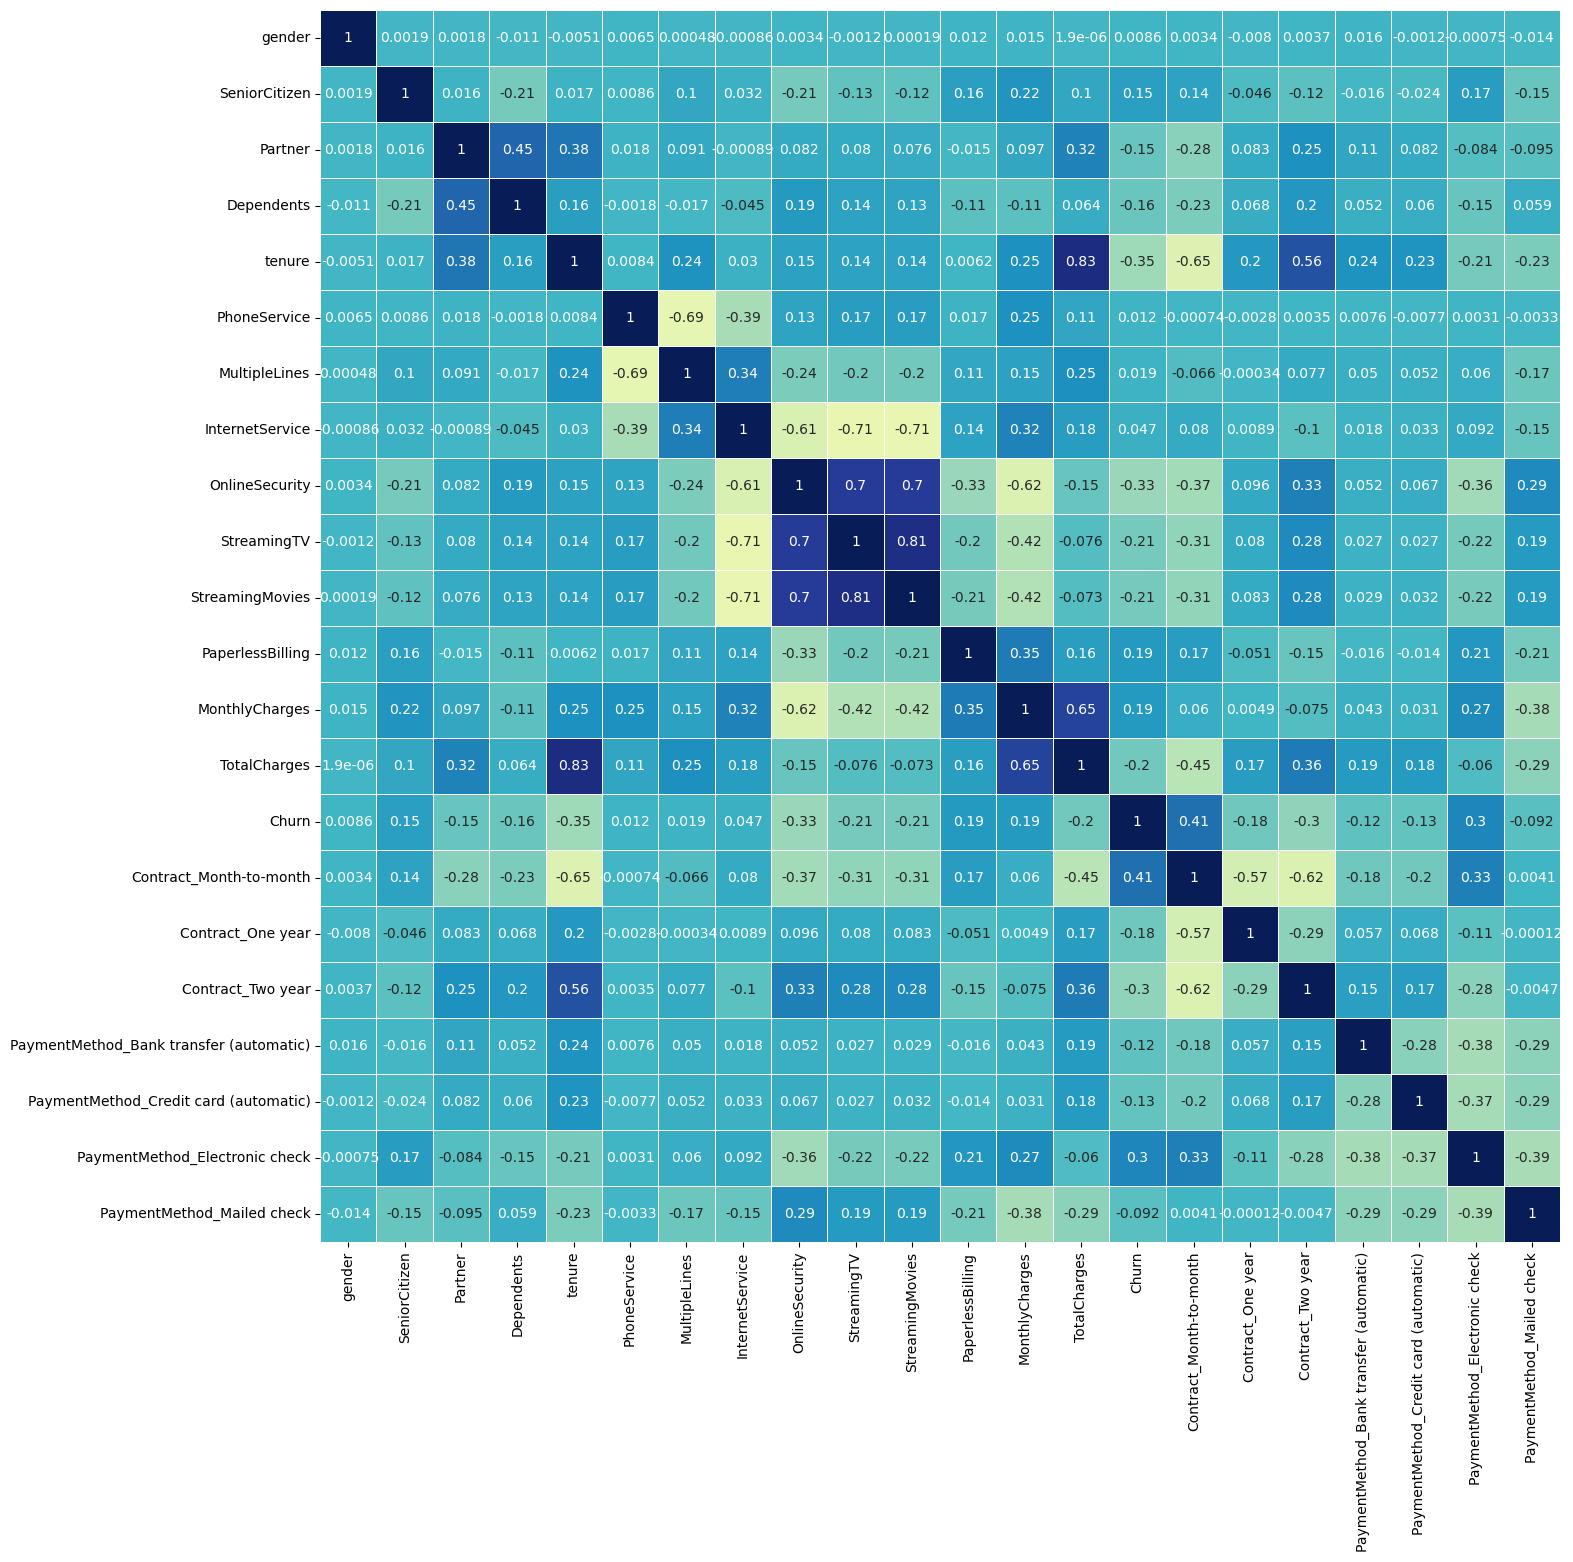

In [329]:
plt.figure(figsize=(16,16))
sns.heatmap(normal_churnData.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [310]:
# From above correlation chart gender doesn't seem to have much correlation with churn, so will drop this column

norm_churnData=normal_churnData.drop(columns=["gender"])

In [311]:
# F. Split the data into 80% train and 20% test.

X = norm_churnData.drop("Churn", axis=1)
y = norm_churnData['Churn']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [312]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

# 3. Model building and performance improvement :

In [313]:
# A. Train a model using Decision tree and check the performance of the model on train and test data.

from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [350]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

0.9975659229208925
0.7269285376242309


In [351]:
print(get_metrics_score(dTree))

Accuracy on training set :  0.9975659229208925
Accuracy on test set :  0.7269285376242309
Recall on training set :  0.9910514541387024
Recall on test set :  0.5151515151515151
Precision on training set :  1.0
Precision on test set :  0.45868465430016864
[0.9975659229208925, 0.7269285376242309, 0.9910514541387024, 0.5151515151515151, 1.0, 0.45868465430016864]


In [321]:
# B. Use grid search and improve the performance of the Decision tree model , check the performance of the model on train and test data , provide the
# differences observed in performance in Q3.a and Q3.b.
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the Decision Tree model, Popular integer random seeds are 0 and 42
dt = DecisionTreeClassifier(random_state=42)

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Perform Grid Search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the Grid Search
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the Decision Tree model with the best parameters
best_dt = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_dt.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Classification Report: \n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
Accuracy:  0.7931850449597728
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1585
           1       0.58      0.61      0.60       528

    accuracy                           0.79      2113
   macro avg       0.73      0.73      0.73      2113
weighted avg       0.80      0.79      0.79      2113



**Observation:**
- When not used Grid, performance score of the model is: on Train data: 0.9975659229208925; on Test data:
0.726928537624230
- So this is obviously not a good indicator when we have 29 basis point difference in Train and Test data.
- After Grid search, precision, recall and f1 score is approx 85 for "No". And same is approx 60 for "Yes".
- After grid search, accurecy is 79 which is much better than 72 on Test data.9

In [341]:
# C. Train a model using Random forest and check the performance of the model on train and test data 
# D. Use grid search and improve the performance of the Random tree model , check the performance of the model on train and test data , provide the
# differences observed in performance in Q3.c and Q3.d 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, AdaBoostRegressor
from sklearn.metrics import accuracy_score, classification_report


In [323]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [324]:
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  0.9975659229208925
Accuracy on test set :  0.795551348793185
Recall on training set :  0.9955257270693513
Recall on test set :  0.5492424242424242
Precision on training set :  0.9955257270693513
Precision on test set :  0.5991735537190083


In [325]:
# D. Use grid search and improve the performance of the Random tree model , check the performance of the model on train and test data , provide the
# differences observed in performance in Q3.c and Q3.d 
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=8,
                       n_estimators=150, random_state=1)

In [331]:
rf_estimator_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.8407707910750507
Accuracy on test set :  0.8192143871273071
Recall on training set :  0.6017897091722595
Recall on test set :  0.5852272727272727
Precision on training set :  0.7627599243856332
Precision on test set :  0.6546610169491526


**Observations:**
- Earlier Train data and Test data accuracy differnce was huge, approx 20-30 basis points for Accuracy, Recall and Precision score
- After grid search and hyperparameter tunning, performance is much better on Train and Test data.

In [344]:
# E. Train a model using Adaboost and check the performance of the model on train and test data
dt = DecisionTreeClassifier(random_state=42)

ada = AdaBoostClassifier(base_estimator=dt, random_state=7, learning_rate=0.1)
ada.fit(X_train,y_train)
y_test_pred = ada.predict(X_test)
y_train_pred = ada.predict(X_train)

C:\Users\abhin\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [352]:
print(get_metrics_score(ada))

Accuracy on training set :  0.9975659229208925
Accuracy on test set :  0.7340274491244676
Recall on training set :  0.9925428784489188
Recall on test set :  0.5359848484848485
Precision on training set :  0.9984996249062266
Precision on test set :  0.4716666666666667
[0.9975659229208925, 0.7340274491244676, 0.9925428784489188, 0.5359848484848485, 0.9984996249062266, 0.4716666666666667]


In [340]:


# F. Use grid search and improve the performance of the Adaboost model , check the performance of the model on train and test data , provide the
# differences observed in performance in Q3.e and Q3.f 


# Set up the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10],
    'base_estimator__max_depth': [1, 2, 3, 4, 5],
    'base_estimator__min_samples_split': [2, 5, 10],
    'base_estimator__min_samples_leaf': [1, 2, 4]
}

# Initialize the AdaBoost model
adaboost = AdaBoostClassifier(base_estimator=dt, random_state=42)

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Perform Grid Search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the Grid Search
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the AdaBoost model with the best parameters
best_adaboost = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_adaboost.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Classification Report: \n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 540 candidates, totalling 2700 fits


C:\Users\abhin\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters found:  {'base_estimator__max_depth': 2, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'learning_rate': 0.1, 'n_estimators': 100}
Accuracy:  0.8092759110269758
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1585
           1       0.64      0.54      0.59       528

    accuracy                           0.81      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



**Observation:**
- R2_score on Train data is  0.9877079044034002, however that drastically reduces on test data: Test R2_score -0.4189680718860529
- When applied grid search and optimal hyperparameters, Precision, recall and f1 score is much better on Train and Test data and distributed uniformally.

In [356]:
# G. Train a model using GradientBoost and check the performance of the model on train and test data 


from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(X_train, y_train)


In [357]:
print(get_metrics_score(gbcl))

Accuracy on training set :  0.7993914807302231
Accuracy on test set :  0.8078561287269286
Recall on training set :  0.44220730797912006
Recall on test set :  0.4564393939393939
Precision on training set :  0.7110311750599521
Precision on test set :  0.6694444444444444
[0.7993914807302231, 0.8078561287269286, 0.44220730797912006, 0.4564393939393939, 0.7110311750599521, 0.6694444444444444]


In [359]:
# H. Use grid search and improve the performance of the GradientBoost model , check the performance of the model on train and test data , provide
# the differences observed in performance in Q3.g and Q3.h

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': [16, 'sqrt', 'log2']
}

gbcl = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(estimator=gbcl, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_gbcl = grid_search.best_estimator_

y_pred = best_gbcl.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Classification Report: \n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
Best parameters found:  {'learning_rate': 0.2, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50, 'subsample': 0.9}
Accuracy:  0.8097491717936584
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1585
           1       0.64      0.55      0.59       528

    accuracy                           0.81      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



In [362]:
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.2, max_depth= 3, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 5, subsample= 0.9 )
gbcl = gbcl.fit(X_train, y_train)
print(get_metrics_score(gbcl))

Accuracy on training set :  0.811156186612576
Accuracy on test set :  0.8173213440605773
Recall on training set :  0.5398956002982849
Recall on test set :  0.5833333333333334
Precision on training set :  0.697495183044316
Precision on test set :  0.6497890295358649
[0.811156186612576, 0.8173213440605773, 0.5398956002982849, 0.5833333333333334, 0.697495183044316, 0.6497890295358649]


**Observations:**

- Even after grid search there doesn't seem much difference in Accuracy, Recall and Precsion.
  
- Before grid search and hyperparameter tunning:
--> Accuracy on training set :  0.7993914807302231--> 
Accuracy on test set :  0.8078561287269286--> 
Recall on training set :  0.4422073079791200--> 6
Recall on test set :  0.45643939393939--> 39
Precision on training set :  0.7110311750599--> 521
Precision on test set :  0.66944444444
  
- After grid search and hyperparameter tunning:
  

-- Accuracy on training set :  0.811156186612576-- 
Accuracy on test set :  0.8173213440605773-- 
Recall on training set :  0.539895600298284-- 9
Recall on test set :  0.58333333333333-- 34
Precision on training set :  0.697495183044-- 316
Precision on test set :  0.649789029535864944444

In [369]:
# I. Provide detailed analysis of the below steps:

import time

def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, train data and test data as input

    start = time.time()  # note the start time

    model.fit(X_train, y_train)   # fit the model using the train data

    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)


    end = time.time()  #note the end time


    duration = end - start  # calculate the total duration


    return train_acc, test_acc, train_recall, test_recall, train_precision, test_precision, duration   # return all the metrics along with predictions



In [376]:
dtcl = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 10, splitter= 'best', random_state=1)

rfcl = RandomForestClassifier(max_features=0.60, max_samples=0.60, min_samples_leaf=8, n_estimators=150, random_state=1)

dt = DecisionTreeClassifier(random_state=7, max_depth= 2, min_samples_leaf= 1, min_samples_split= 2,)
adacl = AdaBoostClassifier(base_estimator=dt, learning_rate= 0.1, n_estimators= 100)

gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.2, max_depth= 3, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 5, subsample= 0.9 )

result = {}   # Create an empty dictionary to later use to store metrics of each of the models

# putting all 4 models in a for loop and appending the results of each of the models to the 'result' dictionary
for model, name  in zip([dtcl, rfcl, adacl, gbcl], ['Decision Tree', 'Random Forest','Ada Boost', 'Gradient Boost']):
    result[name] = fit_n_print(model,X_train, X_test,y_train, y_test)
    # store all the metrics in the result dict, with name as key

result

C:\Users\abhin\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


{'Decision Tree': (0.8212981744421907,
  0.7846663511594889,
  0.5898583146905294,
  0.5321969696969697,
  0.7049910873440285,
  0.5746421267893661,
  0.03395223617553711),
 'Random Forest': (0.8407707910750507,
  0.8192143871273071,
  0.6017897091722595,
  0.5852272727272727,
  0.7627599243856332,
  0.6546610169491526,
  1.391725778579712),
 'Ada Boost': (0.808316430020284,
  0.8092759110269758,
  0.5354213273676361,
  0.5435606060606061,
  0.6903846153846154,
  0.6391982182628062,
  0.8776407241821289),
 'Gradient Boost': (0.813184584178499,
  0.8140085186938003,
  0.5622669649515287,
  0.5890151515151515,
  0.6930147058823529,
  0.6386036960985626,
  0.16158342361450195)}

In [383]:
# (1) Compare the performance of each model in train stage and test stage
	
	
#result1 = pd.DataFrame(result).T.iloc[:,:-1]
result1 = pd.DataFrame(result).T
result1.columns = ['Train Accuracy', 'Test Accuracy','Train Recall', 'Test Recall', 'Train Precision', 'Test Precision', 'Time Elapsed']

result1.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

print("Performance comparision of each model in train and test stage:")
result1

Performance comparision of each model in train and test stage:


,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Time Elapsed
Model,,,,,,,
Decision Tree,0.821298,0.784666,0.589858,0.532197,0.704991,0.574642,0.033952
Random Forest,0.840771,0.819214,0.601790,0.585227,0.762760,0.654661,1.391726
Ada Boost,0.808316,0.809276,0.535421,0.543561,0.690385,0.639198,0.877641
Gradient Boost,0.813185,0.814009,0.562267,0.589015,0.693015,0.638604,0.161583


# (2) Provide your observation on which model performed the best
- comparing based on above table, it's evident that Gradient Boost is the best fit model.
```
It's Train and Test stage accuracy is almost identical.
It's Train and Test stage recall is almost identical.
It's Train and Test stage precesion is almost identical.
The time duration is only above Decision Tree, however there is substantial difference in Train stage and Test stage for Decision Tree.
```

In [385]:
# (3) Provide your reasoning on why the model performed best

# There are several reasons why Grdient Boost performed well on the data:
#  a.) It follows sequential learning, which improves with each submodel.
#  b.) As errors at each submodel is corrected in the next, so it can handle complex data
#  c.) Gradient boost's parameters can be hypertuned and provides flexibility.
#  d.) It's ability to improve over weak learners, makes it one of the best performing model


# (4) Provide your final conclusion on your observation

```
whle trying to find Hyperparameter Gradient Boost seems very resource and time consuming.
However once best performing Hyperparameter is found, Training and Testing with Gradeint boost is pretty fast.
This is also true for the reason that it use several weak learner to correct the errors observed at the each stage of the model
```